In [34]:
import sys
try:
    sys.path.remove("\\\\?\\C:\\Users\\andre\\Documents\\tracking_optimizations\\gpu-tracking")
except ValueError:
    pass

import gpu_tracking
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tifffile
import pandas as pd
import trackpy as tp
from skimage.feature.blob import blob_log

In [7]:
vid = gpu_tracking.load("easy_test_data.tif", keys = range(50)).astype("float32")

In [42]:
blob_log_df = pd.DataFrame(blob_log(vid[0], min_sigma = 2, max_sigma = 8))
blob_log_df["frame"] = 0
blob_log_df.rename(columns = {0: "y", 1: "x", 2: "r"}, inplace = True)

In [ ]:
d = 9
track_df = gpu_tracking.batch(vid, 9, minmass = 700)
gpu_tracking.annotate_video(vid, track_df, 0, r = d/2)

In [ ]:
track_df = gpu_tracking.LoG(vid, 1, 3, overlap_threshold = 0, minmass = 0)
gpu_tracking.annotate_video(vid, track_df[track_df["r"] != track_df["r"].min()], 0)

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

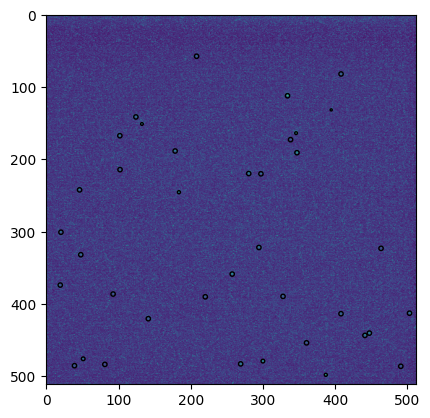

In [32]:
track_df.groupby("r").count() / len(track_df)

,frame,y,x,mass,raw_mass,raw_bg_median,raw_mass_corrected
r,,,,,,,
1.000000,0.001489,0.001489,0.001489,0.001489,0.001489,0.001489,0.001489
1.777778,0.032013,0.032013,0.032013,0.032013,0.032013,0.032013,0.032013
2.555556,0.044834,0.044834,0.044834,0.044834,0.044834,0.044834,0.044834
3.333333,0.073703,0.073703,0.073703,0.073703,0.073703,0.073703,0.073703
4.111111,0.000744,0.000744,0.000744,0.000744,0.000744,0.000744,0.000744
4.888889,0.079659,0.079659,0.079659,0.079659,0.079659,0.079659,0.079659
5.666667,0.074531,0.074531,0.074531,0.074531,0.074531,0.074531,0.074531
6.444444,0.199107,0.199107,0.199107,0.199107,0.199107,0.199107,0.199107
7.222222,0.212259,0.212259,0.212259,0.212259,0.212259,0.212259,0.212259


In [ ]:
gpu_tracking.batch_file()